# Youtube Trending 2017 - 2018 Analysis

YouTube has become one of the top social media platforms in the world for sharing videos. YouTube also has a trending page, which consists of videos steadily gaining views that YouTube considers to be "trending". Getting on YouTube trending could mean a substantial boost in the growth of both that video and your channel.

Using Trending Tab data from 2017 and 2018, this project attempts to gain insights on the statistics of YouTube Trending in 5 countries(US, Canada, UK, India, and France). 

In [1]:
#Import neccessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
style.use('fivethirtyeight')
print("Imported modules!")

Imported modules!


In order to collect the data for the analysis, five datasets representing different countries were combined into one total dataset(AllVideos.csv). Feature engineering was applied to the dataset to add numerous amounts of new features to explore and gain insights on videos in Youtube Trending. 

In [2]:
#Read dataframe from SQL Server(converted to csv)

df = pd.read_csv('AllVideos.csv')
print(df)

           video_id trending_date  \
0       AS9-ITLhQxo      17.14.11   
1       kzwfHumJyYc      17.14.11   
2       nc99ccSXST0      17.14.11   
3       y9r_3IJdtkU      17.15.11   
4       66Y44OxufVM      17.15.11   
...             ...           ...   
186755  U3xLOo-CNwo      17.14.11   
186756  nAvudA4X6vI      17.15.11   
186757  7MxiQ4v0EnE      17.14.11   
186758  fy-CuCzaPp8      17.14.11   
186759  LUzsOyWp9lw      17.14.11   

                                                    title  \
0                 I Hired An MI6 Spy To Help Me Disappear   
1       Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
2                     5 Ice Cream Gadgets put to the Test   
3       MapapaWOW ka sa Galing!!! 31st ASEAN Summit Wo...   
4       RUM (Regular Use Medicine) By Meet Hundal || D...   
...                                                   ...   
186755  12 Weird Ways To Sneak Food Into Class / Back ...   
186756                    Online Gaming Insults Gone Wild   
186757

One common occurence that can be observed within the dataset is the substantial amount of VEVO music videos reaching trending. VEVO is an American music production company that provides music videos to Youtube. In order to grasp the relationship between country and amount of American music videos watched, a countplot can be made.

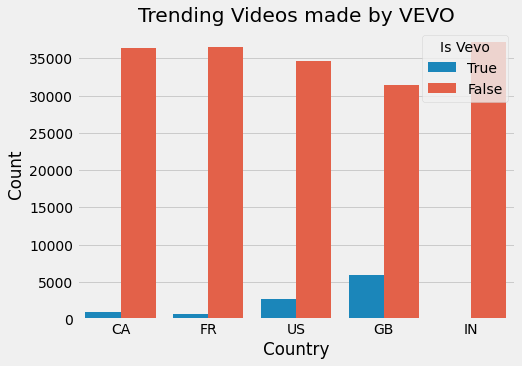

In [8]:
#Display IsVEVO results in countplot

plt.figure(figsize=(7,5))
sns.countplot(x='Country', hue='Is Vevo', data=df, hue_order=[True, False])
plt.ylabel('Count')
plt.title('Trending Videos made by VEVO')
plt.show()

The results of the countplot show that, although the large majority of trending videos are not VEVO music videos, countries such as the United States and Great Britain generally watch and enjoy American music videos more than others. Countries that aren't english speaking or have a large part of their population that isn't English, generally listen to American music videos less. 

Within Youtube, it is understood that a video with more views will have more likes. In order to explore the properties of this relationship, a regression scatter plot can be formed. 

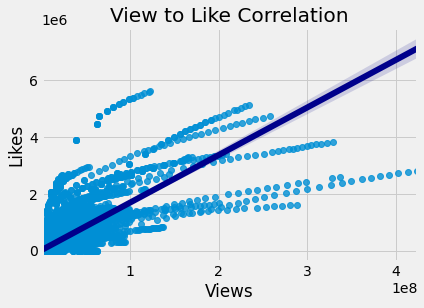

In [9]:
#Correlation between amount of views and amount of likes

sns.regplot(x='views', y='likes', data=df, line_kws={'color':'darkblue'})
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('View to Like Correlation')
plt.show()

Based off of the regression scatter plot, the relationship between views and likes is mostly linear. However, the relationship begins to flatten out when the amount of views bypasses 100 million. 

Viewers who watch Youtube videos tend not to press the like button on most of the videos they watch. The culture and mannerisms of different countries could have an affect on the percentage of viewers who press the like button on videos. This potential relationship can be further explored on using a bar plot. 

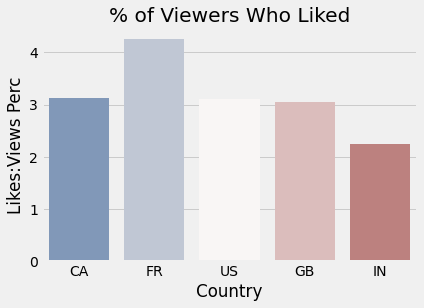

In [10]:
#Correlation between country and like-to-view percentage

sns.barplot(x='Country', y='Likes:Views Perc', data=df, ci=None, palette='vlag')
plt.title('% of Viewers Who Liked')
plt.show()

The bar plot shows that countries such as France house a culture that makes French viewers press the like button on videos more often. Countries such as India have a culture that makes viewers press the like button on videos less often. 

Just as it has been observed that the culture of a country can affect the amount of times they like a video, it could also potentially affect the amount of times they comment on a video. This can further be inspected.

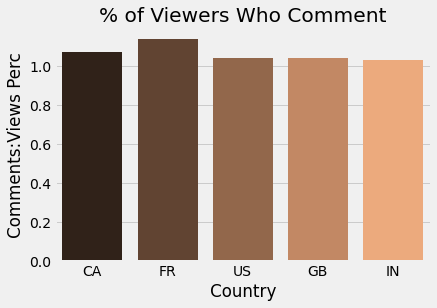

In [11]:
#Correlation between country and comment percentage

sns.barplot(x='Country', y='Comments:Views Perc', data=df, ci=None, palette='copper')
plt.title('% of Viewers Who Comment')
plt.show()

The results of the bar graph show that, interestingly, there is little correlation between countries and the amount of comments that they make. That is to say, the culture of a country does not affect whether a person within the country feels the need to write something under a video they watch. 

YouTube has a tag feature that allows content creators to tag their videos with keywords, and for viewers to search for those tags to get relevant videos. Since the amount of tags could affect the amount of viewers watching a video, this correlation can be explored using a bar graph.

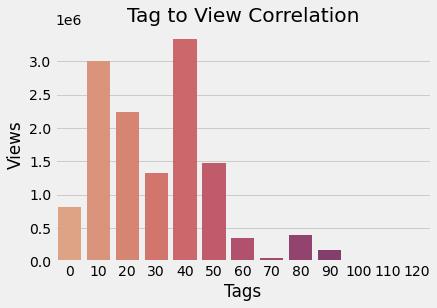

In [14]:
#Correlation between amount of tags and amount of views

sns.barplot(x='tags num', y='views', data=df, palette='flare', ci=None, order=range(0,130,10))
plt.xlabel('Tags')
plt.ylabel('Views')
plt.title('Tag to View Correlation')
plt.show()

The graph displays that tags between 10 and 40 tend to attract the most viewers. This could be because videos with no tags don't get viewers that sort by tags, and videos with a lot of tags tend to have less meaningful ones.

Just as the culture of countries affect the percentage of viewers who like videos, the culture of countries could also have an affect on the ratio of all people who like videos to those who disliked it. 

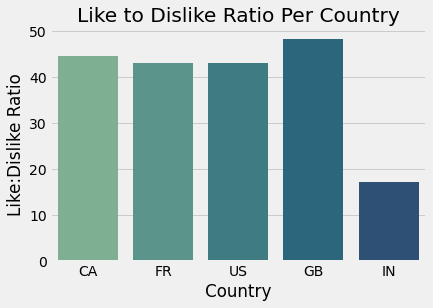

In [15]:
#Correlation between country and like-to-dislike ratio

sns.barplot(x='Country', y='Like:Dislike Ratio', data=df, ci=None, palette='crest')
plt.title('Like to Dislike Ratio Per Country')
plt.show()

The results of the bar plot show India as the fundemental outlier of the group, as it has a much less like:dislike ratio than all the other countries. This show Indians tend to be more negatively opinionated on videos they watch than people from other countries.

The countries where a video is trending could affect the number of views that video gets. Using a box plot, this correlation can be closer inspected on.

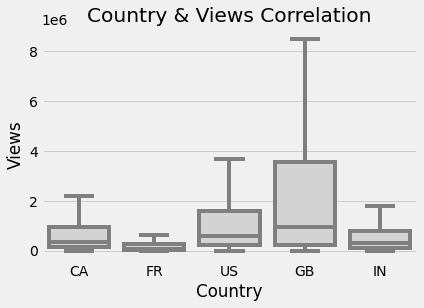

In [16]:
#Correlation between country and amount of views

sns.boxplot(x='Country', y='views', data=df, showfliers=False, color='lightgray')
plt.ylabel('Views')
plt.title('Country & Views Correlation')
plt.show()

The box plot shows that in non-English speaking countries, videos that end up on trending don't end up getting very many views. This is simply because of lack of access to Youtube within those countries and the fact that only people that know the language of the country can enjoy the video. Great Britain by far has the most views on their trending videos, possibly because the videos British people enjoy tend to be enjoyed by large sums of people. 

The amount of trending videos can also greatly vary per month due to numerous factors within countries and within the YouTube platform. Using a count plot, we can closely examine how many trending pages there are per month per country. 

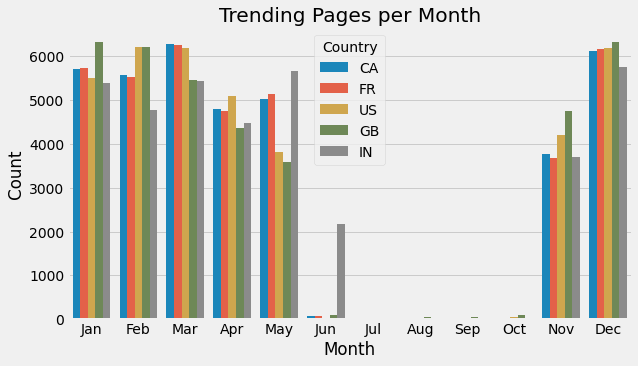

In [18]:
#Correlation between month and amount of trending videos per country

num2month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Month Index'].apply(lambda x: num2month[x])

plt.figure(figsize=(9,5))
sns.countplot(x='Month', hue='Country', data=df, order=num2month.values())
plt.ylabel('Count')
plt.title('Trending Pages per Month')
plt.show()

The results display that the number of trending pages falls dramatically from June to October, except in India where it falls from July to October. Youtubers should expect less of their videos to hit trending within these months, and more of their videos to hit trending within the Winter. 

Since different countries have different time zones, and different countries have different cultures that promote or obstruct staying up past normal time zones, the country of the video producer could affect the hour of the publish time of the video. 

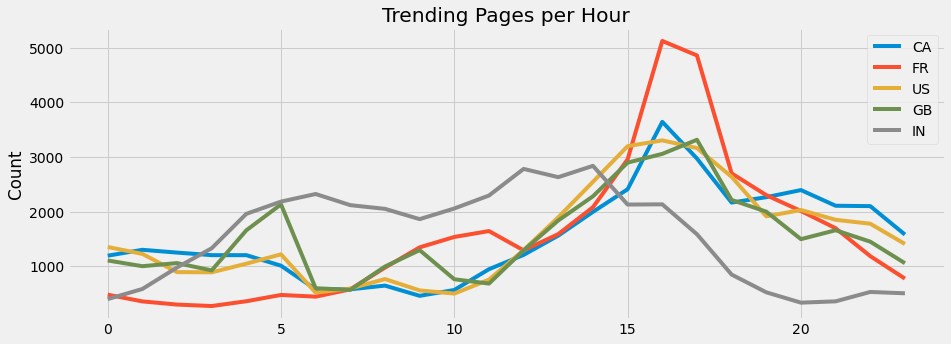

In [21]:
#Correlation between hour and trending pages per country

x = list(range(0,24)) * 5
y = []
hue = []
for cont in ['CA', 'FR', 'US', 'GB', 'IN']:
    y_app = [len(np.array(df[(df['Country'] == cont) & (df['Hour'] == hour)])) for hour in np.unique(x)]
    y.append(y_app)
    hue.append([cont for i in range(len(np.unique(x)))])
y, hue = np.ravel(y), np.ravel(hue)

plt.figure(figsize=(14,5))
sns.lineplot(x=x, y=y, hue=hue)
plt.ylabel('Count')
plt.title('Trending Pages per Hour')
plt.show()

The line plot shows that Indian Youtube videos that hit trending are published at around the hours 5 - 15, while British, American, Canadian, and French Youtube videos are published around the hours of 15 - 18. 

The amount of characters in a title can affect the appeal of the video to viewers, and can therefore affect the amount of views that a video has. Using a bar plot, this correlation can be discovered.

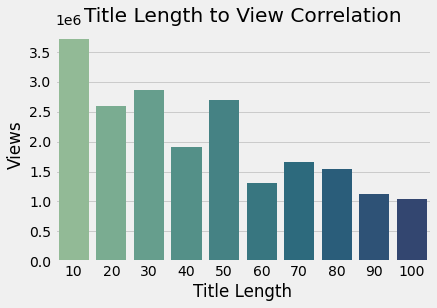

In [22]:
#Correlation between title length and viewership

sns.barplot(x='Title Length', y='views', data=df, ci=None, palette='crest')
plt.ylabel('Views')
plt.title('Title Length to View Correlation')
plt.show()

The bar plot shows that as the length of a title increases, the amount of views that it gets starts decreasing. Youtubers looking to get their videos to the trending tab should aim for a title length between 10 and 50 characters. 

Possibly the largest influence to whether a person clicks on a video or not is the words within the title of the video. Using a word cloud that displays the most common phrases of a title, we can go through every country and see how their culture affects the types of videos that get to trending. 


COUNTRY: CA



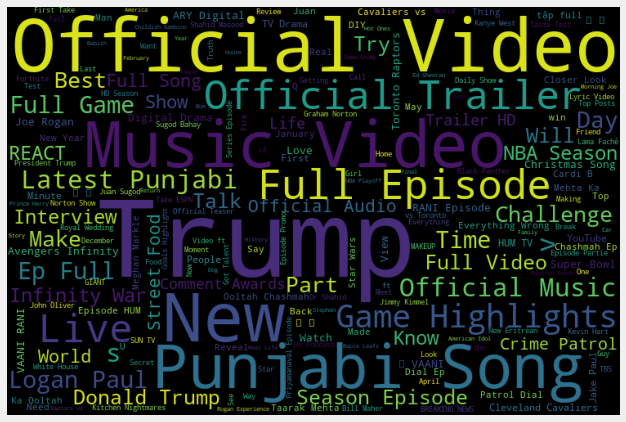


COUNTRY: GB



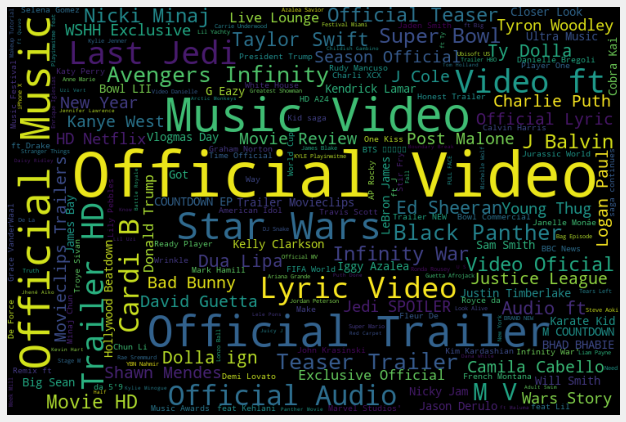


COUNTRY: IN



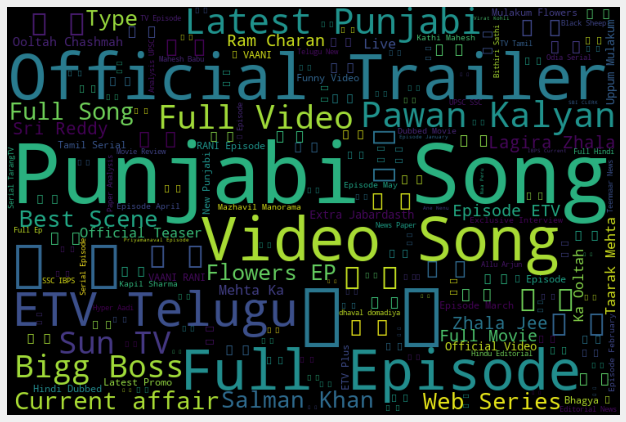


COUNTRY: US



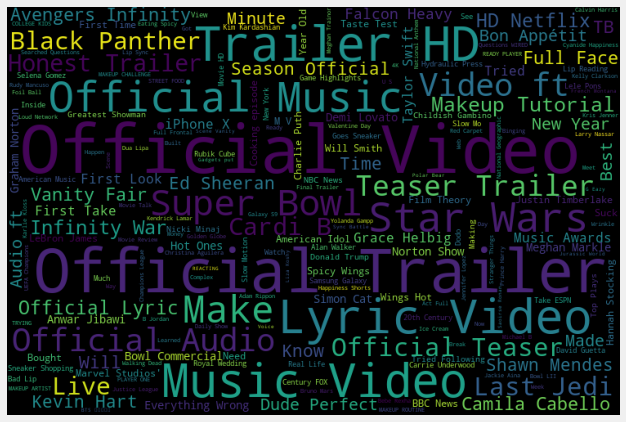


COUNTRY: FR



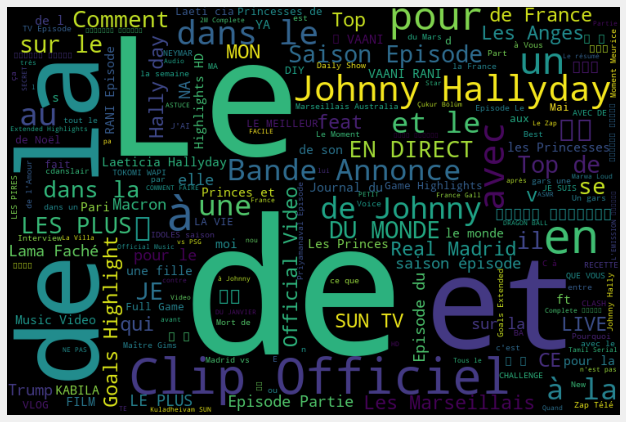

In [24]:
for cont in countries:
    print("\nCOUNTRY: %s\n" % cont)
    country_title = np.array(df[df['Country'] == cont]['title'])
    total_title = ' '.join(country_title)
    
    wordcloud = WordCloud(width = 750, height = 500, stopwords = set(STOPWORDS)).generate(total_title)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

The word cloud shows that:
    
Canadian Trending Videos tend to be about Music Videos, Punjabi songs, and American politics. 

British Trending Videos tend to be about Music Videos and Movies.

Indian Trending Videos are mostly songs, including Punjabi ones

USA Trending Videos are mostly about Movie Trailers, songs, and sports.

French Trending Videos are mostly about Official Clips and sports.

The most trending channels tend to be targetted to a wide variety of audiences. The correlation between the top channels on Youtube trending and the cultures that they target can be explored with a count plot. 

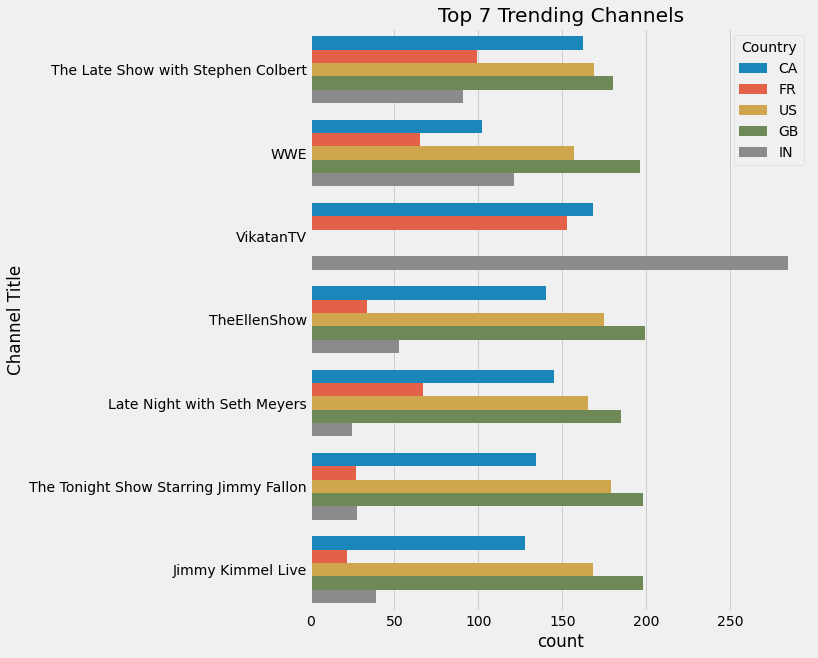

In [23]:
#Top 7 Youtube channels on the trending page with country data

plt.figure(figsize=(8,10))
sns.countplot(y='channel_title', hue='Country', data=df, order=df['channel_title'].value_counts().iloc[:7].index)
plt.ylabel('Channel Title')
plt.title('Top 7 Trending Channels')
plt.show()

Out of all the trending Youtube channels, most appeal to English speaking countries, with only one out of the top 7 most trending Youtube channels appealing to a wider variety of languages. 

Youtubers should be able to harness the knowledge of how long it takes to get on Youtube trending, so they know as soon as possible whether or not their video is going to make it. A count plot can aid with this task. 

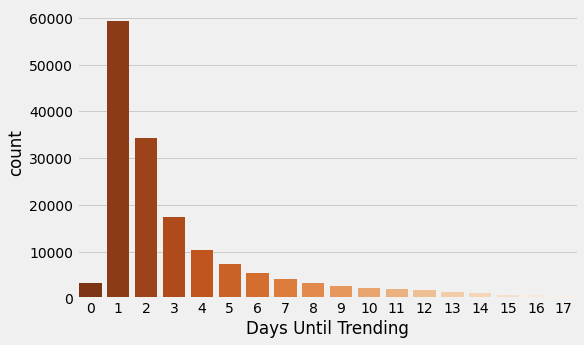

In [24]:
#Map the length of the amount of time taken to get on trending

plt.figure(figsize=(8,5))
sns.countplot(x='Days Until Trending', data=df, order=range(0,18), palette='Oranges_r')
plt.show()

The results of the count plot show that the large majority of Youtube Trending Videos take between one and two days to get on the trending tab. 

It is widely accepted, and for good reason, that getting a Youtube video on trending leads to a boost in the amount of views that video gets. What isn't very known, however, is how the amount of days it takes for a video to get trending correlates with the total number of views the video harnesses. 

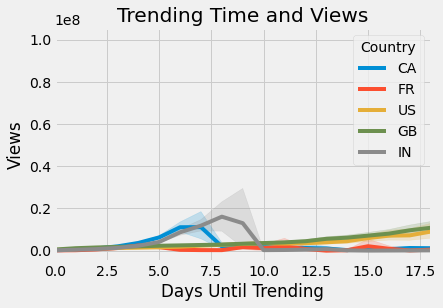

In [25]:
#Correlation between days until trending and views

plt.xlim([0, 18])
sns.lineplot(x='Days Until Trending', y='views', hue='Country', data=df)
plt.ylabel('Views')
plt.title('Trending Time and Views')
plt.show()

The line plot shows that, on average, as the amount of days until a video gets trending increases, the amount of views expected for the video increases as well. On average, this trend tends to fall once the amount of days until trending goes past 10. Interestingly, countries such as Canada and India peak at views between 5 and 10 days of trending. However, this can be explained simply by outlier videos. 

In order to ensure a video doesn't get "trolled", some Youtube videos remove public access to comments, and sometimes even remove access to view the like to dislike ratio. Since different countries could affect the need to do this, this relationship can be explored with a count plot.

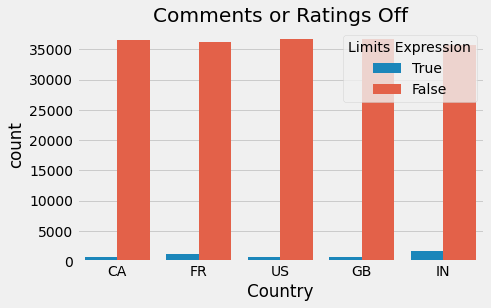

In [27]:
#Correlation between country and limiting features

plt.figure(figsize=(6.5,4))
sns.countplot(x='Country', hue='Limits Expression', data=df, hue_order=[True, False])
plt.title('Comments or Ratings Off')
plt.show()

The count plot displays that a large majority of videos do not limit viewer's expression to free speech. However, countries such as India have a higher ratio of limitting expression than others. This could be explained thanks to the low like to dislike ratio that Indian trending videos tend to have. 